# Данные от Гидромета: "Скорость счета на 1329"
____

### Импортируем библиотеки

In [317]:
import matplotlib.pyplot as plt
from turtle import color
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

plt.style.use('dark_background')

### Строим функцию разделения данных по нуклиду

In [318]:
def K_Sr_split(data):
    data_K = data[data['sorce'].str.contains('K')]
    data_Sr = data[data['sorce'].str.contains('Sr')]
    return data_K, data_Sr

### Вносим данные в таблицу

In [319]:
data = pd.DataFrame(columns=['sample_num', 0.02, 0.05, 0.1, 0.15, 0.200, 0.25])
data.loc[len(data.index)] = [1, 0.016, 0.049, 0.084, 0.154, 0.193, 0.211]
data.loc[len(data.index)] = [2, 0.109, 0.203, 0.56, 0.77, 0.935, 1.205]
data.loc[len(data.index)] = [3, 0.241, 0.47,0.88,  1.437, 1.667, 2.005]
data.loc[len(data.index)] = [4, 0.485, 0.739, 1.352, 2.497, 2.855, 3.223]
data.loc[len(data.index)] = [5, 0.571, 1.585, 2.188, 3.288, 4.153, 4.73]
data.loc[len(data.index)] = [6, 0.145, 0.3, 0.52, 0.68, 0.9, 0.983]
data.loc[len(data.index)] = [7, 0.08, 0.205, 0.318, 0.357, 0.416, 0.527 ]
data.loc[len(data.index)] = [8, 0.084, 0.179, 0.334, 0.483, 0.624, 0.733]
data.loc[len(data.index)] = [9, 0.1, 0.265, 0.385, 0.512, 0.639, 0.814]
data['bg'] = [0.729, 0.729, 0.706, 0.715, 0.714, 0.717, 0.738, 0.714, 0.733]

mass = [0.02, 0.05, 0.1, 0.15, 0.200, 0.25]


<AxesSubplot: >

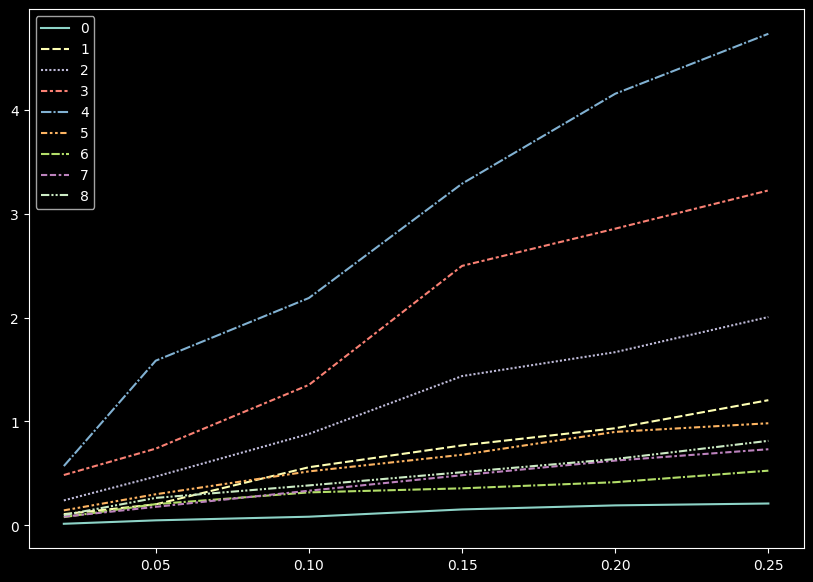

In [320]:
f = plt.figure(figsize=(10,7))
sns.lineplot(data[mass].T, )

### Подгружаем активность

In [321]:
Act = pd.read_csv('Activity_BelGIM_sorces.csv')
Act_BG = pd.DataFrame(columns=['sample_num',  0.02, 0.05, 0.1, 0.15, 0.200, 0.25])
Act_BG['sample_num'] = [1, 2, 3, 4, 5, 6, 7, 8, 9]
for i in data['sample_num']:
    for j in data.columns[1:-1]:
        a = float(Act['Activity'][Act['sample_num'] == i].values)
        Act_BG[j][i-1] = j * a

# Act_BG_Sr, Act_BG_K = SR_K_split(Act_BG)
Act_BG['sorce'] = Act[Act.columns[0]]


C:\Users\fitu2\AppData\Local\Temp\ipykernel_6084\1435819593.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Преобразуем данные в стандартную форму

In [322]:
d_GigMet = pd.DataFrame(columns=['mass', 'activity', 'eff', 'aver_count_rate', 'sorce', 'sample_num', 'bg'])

for i in data.index:
    for j in mass:
        d_GigMet.loc[len(d_GigMet)] = [j, Act_BG[j][data['sample_num'][i] - 1], 0, data[j][i], Act_BG['sorce'][data['sample_num'][i] - 1], data['sample_num'][i], data['bg'][i] ]
d_GigMet.head()
d_GigMet['device'] = '1329 #NN'

### Расчитываем эффективность

C:\Users\fitu2\AppData\Local\Temp\ipykernel_6084\3757248965.py:9: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



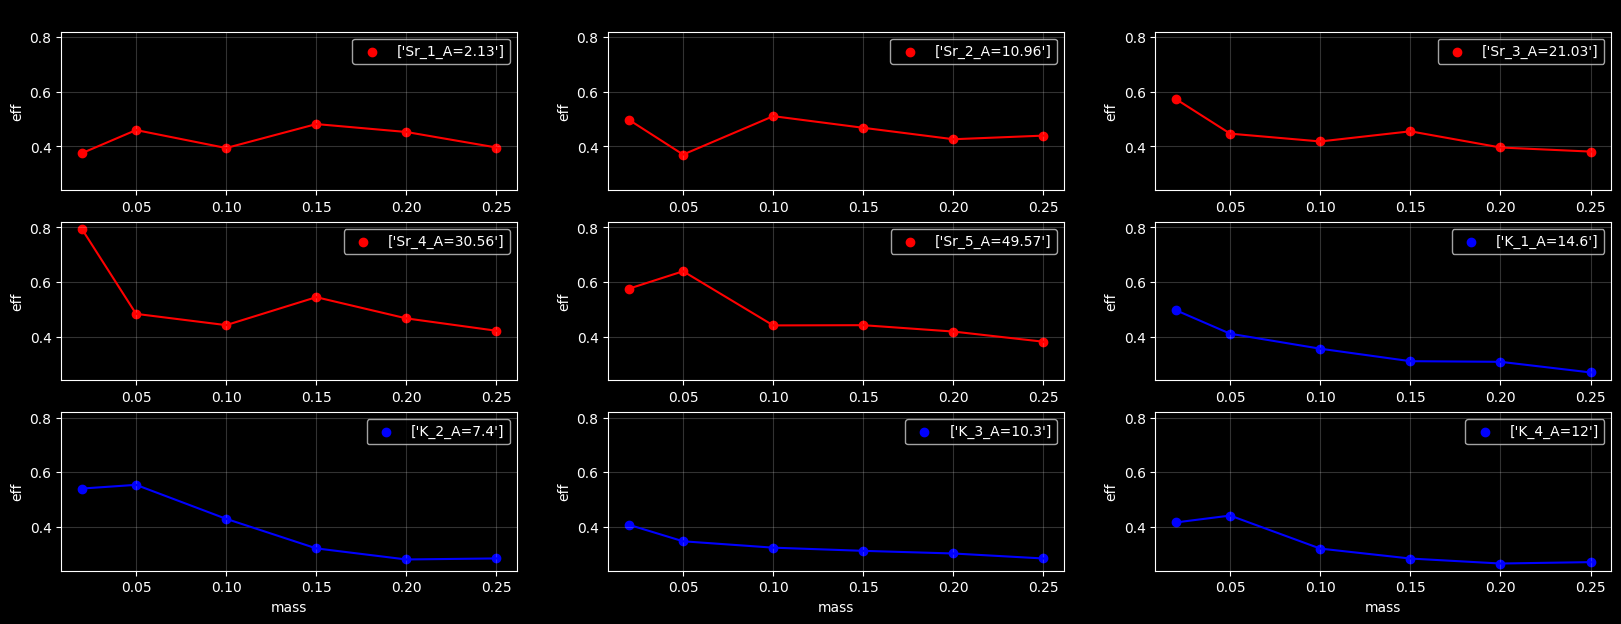

In [323]:
d_GigMet['eff'] = d_GigMet['aver_count_rate'] / d_GigMet['activity']

plt.figure(figsize=(20, 7))

ax = None

for i in d_GigMet['sample_num'].values:
    dt = d_GigMet[d_GigMet['sample_num'] == i]
    ax = plt.subplot(3, 3, int(i) , sharey=ax)
    col = 'b'
    if i in [1, 2, 3,4, 5]: col = 'r'
    plt.scatter(dt['mass'], dt['eff'], label=dt['sorce'].unique(), c=col)

    plt.plot(dt['mass'], dt['eff'], c=col)

    plt.ylabel('eff')
    plt.xlabel('mass')
    plt.title(" ")
    plt.grid(alpha=0.2)
    plt.legend()

plt.show()


### Усредняем по нуклиду

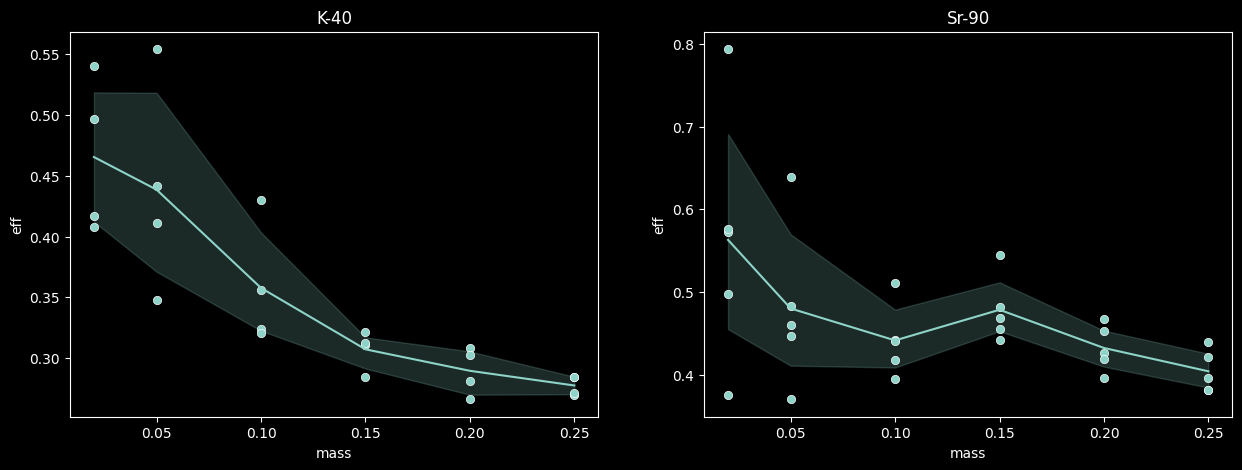

In [324]:
def K_Sr_split(data):
    data_K = data[data['sorce'].str.contains('K')]
    data_Sr = data[data['sorce'].str.contains('Sr')]
    return data_K, data_Sr

d_GidMet_K, d_GidMet_Sr = K_Sr_split(d_GigMet)
fig1 = plt.figure(figsize=(15, 5))
ax1 = plt.subplot(1, 2, 1)
sns.lineplot(x = 'mass', y = 'eff', data = d_GidMet_K, )
sns.scatterplot(x = 'mass', y = 'eff', data = d_GidMet_K)
plt.title('K-40')

ax2 = plt.subplot(1, 2, 2)
sns.lineplot(x = 'mass', y = 'eff', data =d_GidMet_Sr)
sns.scatterplot(x = 'mass', y = 'eff', data = d_GidMet_Sr)
plt.title('Sr-90');


### Подгружаем данные для сравнения

In [325]:
d_Atom = pd.read_csv('1329.csv', usecols= ['mass', 'act', 'eff', 'aver', 'nucl', 'beckgr', 'activity', 'aver_range_score', ])
d_Atom = d_Atom.rename(columns= {'nukl':'sorce', })
d_Atom.replace(np.nan, 0, inplace=True)
d_Atom['aver_count_rate'] = d_Atom['aver'] + d_Atom['aver_range_score']
d_Atom['activ'] = d_Atom['activity'] + d_Atom['act']
del d_Atom['act']
del d_Atom['activity']
del d_Atom['aver']
del d_Atom['aver_range_score']
d_Atom = d_Atom.rename(columns= {'activ':'activity', 'nucl':'sorce', 'beckgr':'bk' })
d_Atom['device'] = 'AT'
d_Atom.head()

,mass,eff,sorce,bk,aver_count_rate,activity,device
0,0.05,0.35,K_10_A=12,0.0,0.21,0.6,AT
1,0.10,0.30,K_10_A=12,0.0,0.36,1.2,AT
2,0.15,0.28,K_10_A=12,0.0,0.51,1.8,AT
3,0.20,0.23,K_10_A=12,0.0,0.56,2.4,AT
4,0.35,0.22,K_10_A=12,0.0,0.91,4.2,AT


### Отображаем эффективность

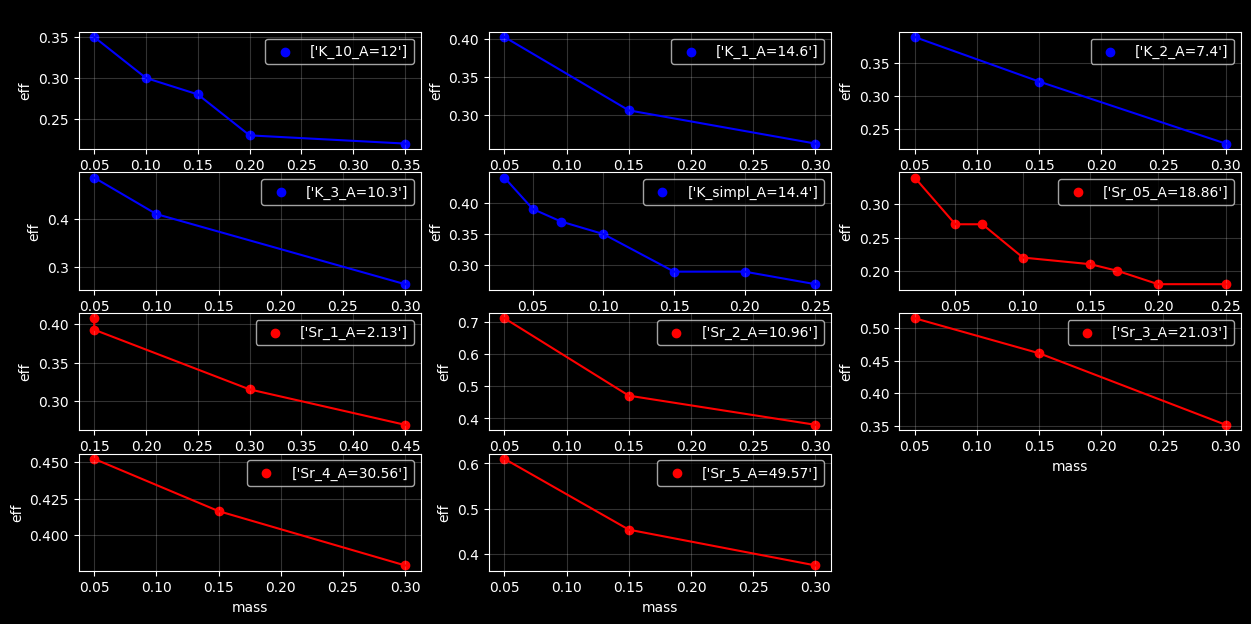

In [326]:
plt.figure(figsize=(15, 7))

ax = None
j = 1
for i in d_Atom['sorce'].unique():
    dt = d_Atom[d_Atom['sorce'] == i]
    ax = plt.subplot(4, 3, j )
    col = 'b'
    if str(i).startswith('Sr'): col = 'r'
    plt.scatter(dt['mass'], dt['eff'], label=dt['sorce'].unique(), c=col)

    plt.plot(dt['mass'], dt['eff'], c=col)

    plt.ylabel('eff')
    plt.xlabel('mass')
    plt.title(" ")
    plt.grid(alpha=0.2)
    plt.legend()
    j +=1

plt.show()

In [327]:
d_Atom_K, d_Atom_Sr = K_Sr_split(d_Atom)


f = px.line(d_Atom_K, x = 'mass', y = 'eff', color='sorce', title='k-40', line_shape="spline", template='plotly_dark', markers=True)

f1 = px.line(d_Atom_Sr, x = 'mass', y = 'eff', color='sorce',  title='Sr-90',line_shape="spline",  template='plotly_dark', markers=True)

f.show()
f1.show()

### Объединяем данные

In [328]:
data = pd.concat([d_Atom, d_GigMet], ignore_index=True)
data['nucl'] = data['sorce'].str[:2]

data['srec_activ'] = data['sorce'].str[-2:]
data

,mass,eff,sorce,bk,aver_count_rate,activity,device,sample_num,bg,nucl,srec_activ
0,0.05,0.350000,K_10_A=12,0.0,0.210,0.6,AT,NaN,NaN,K_,12
1,0.10,0.300000,K_10_A=12,0.0,0.360,1.2,AT,NaN,NaN,K_,12
2,0.15,0.280000,K_10_A=12,0.0,0.510,1.8,AT,NaN,NaN,K_,12
3,0.20,0.230000,K_10_A=12,0.0,0.560,2.4,AT,NaN,NaN,K_,12
4,0.35,0.220000,K_10_A=12,0.0,0.910,4.2,AT,NaN,NaN,K_,12
...,...,...,...,...,...,...,...,...,...,...,...
94,0.05,0.441667,K_4_A=12,NaN,0.265,0.6,1329 #NN,9.0,0.733,K_,12
95,0.10,0.320833,K_4_A=12,NaN,0.385,1.2,1329 #NN,9.0,0.733,K_,12
96,0.15,0.284444,K_4_A=12,NaN,0.512,1.8,1329 #NN,9.0,0.733,K_,12
97,0.20,0.266250,K_4_A=12,NaN,0.639,2.4,1329 #NN,9.0,0.733,K_,12


### Скорекктируем активность  и эффективность образца Sr_05_A

In [329]:
for i in data[data["sorce"] == 'Sr_05_A=18.86'].index:
   data['activity'][i] = data['activity'][i]/2
   data['eff'][i] = data['aver_count_rate'][i] / data['activity'][i]


C:\Users\fitu2\AppData\Local\Temp\ipykernel_6084\1757642325.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\fitu2\AppData\Local\Temp\ipykernel_6084\1757642325.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [330]:
f = px.scatter(data, x = 'mass', y = 'eff', color='nucl', title='All',  template='plotly_dark')
f.show()
df = data.query("nucl=='Sr'")
f = px.scatter(df, x = 'mass', y = 'eff', color='device', title='Sr',  template='plotly_dark')
f.show()
df = data.query("nucl=='K_'")
f = px.scatter(df, x = 'mass', y = 'eff', color='device', title='K',  template='plotly_dark')
f.show()

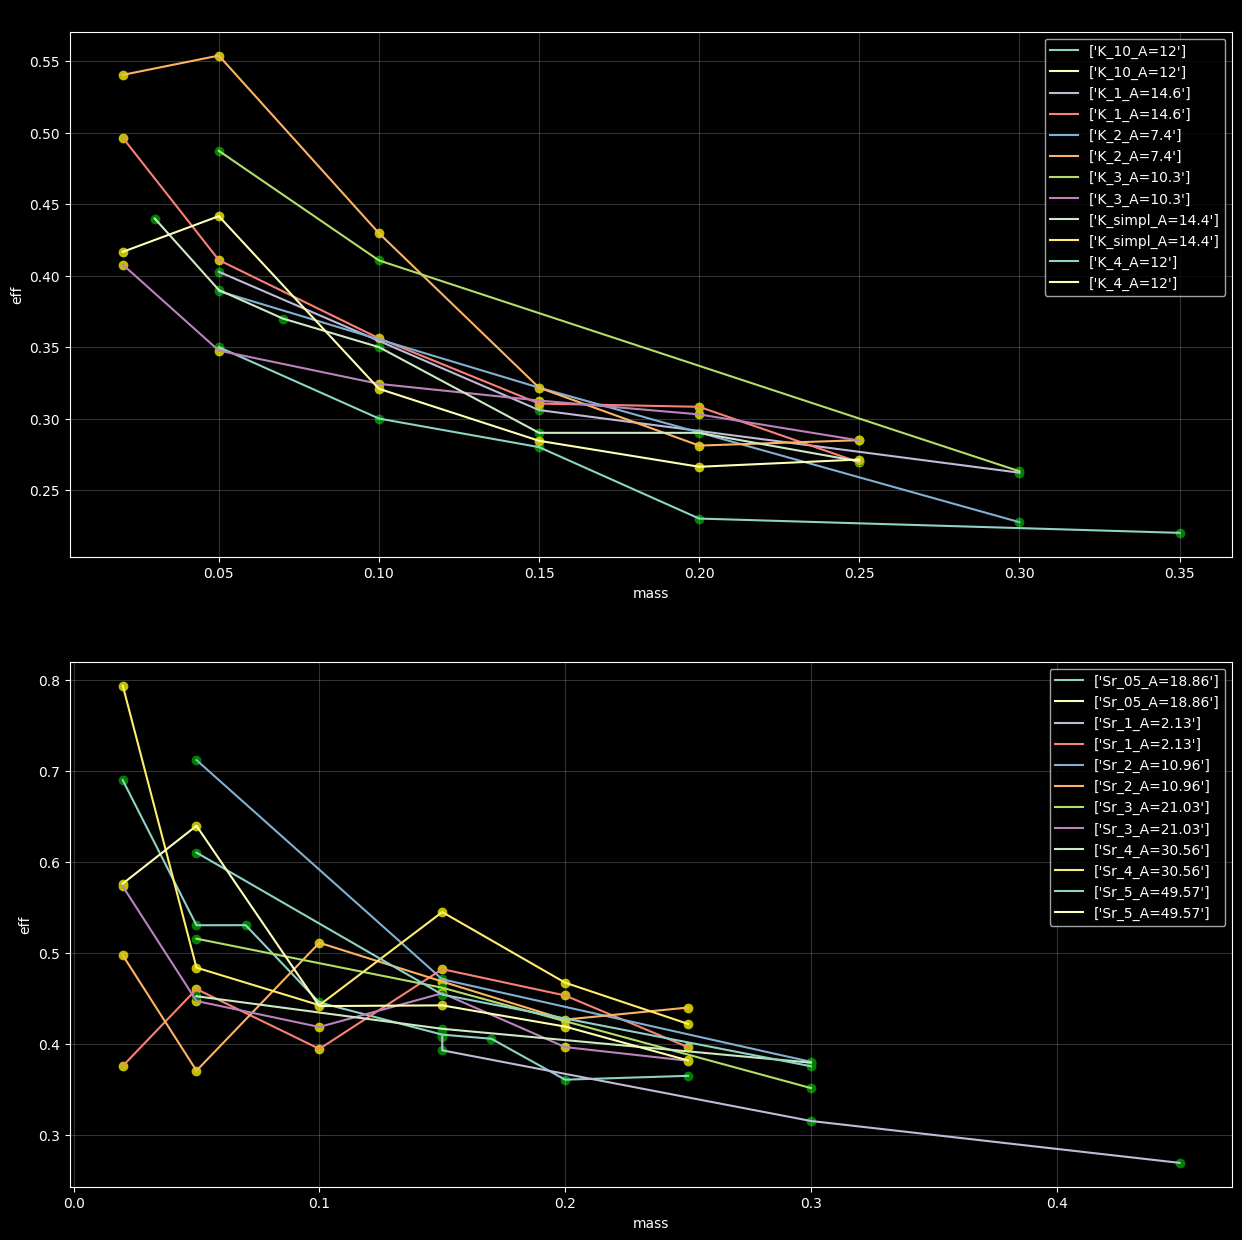

In [331]:
plt.figure(figsize=(15, 15))

ax = None
j = 1
for i in data['sorce'].unique():
    dt = data[data['sorce'] == i]
    dtA = dt[dt['device'] == 'AT']
    dtG = dt[dt['device'] == '1329 #NN']
    ax = plt.subplot(2, 1, 1 )
    
    if str(i).startswith('Sr'):
        ax = plt.subplot(2, 1, 2)
    
    plt.scatter(dtA['mass'], dtA['eff'],  color= 'g')
    plt.scatter(dtG['mass'], dtG['eff'],  color= 'y')
    plt.plot(dtA['mass'], dtA['eff'], label=dt['sorce'].unique())
    plt.plot(dtG['mass'], dtG['eff'], label=dt['sorce'].unique())
    plt.ylabel('eff')
    plt.xlabel('mass')
    plt.title(" ")
    plt.grid(alpha=0.2)
    plt.legend()
    j +=1

plt.show()

# Расчет средних эффективностей

In [332]:
data['count'] = 1
d_eff = data.groupby('mass').mean()
d_eff_weight = data.groupby('mass').sum()['count']
d_eff['weigh'] = d_eff_weight
d_eff['mass'] = d_eff.index

f = px.scatter(d_eff, y='eff', size = 'weigh')
f.show()



C:\Users\fitu2\AppData\Local\Temp\ipykernel_6084\2133543504.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

C:\Users\fitu2\AppData\Local\Temp\ipykernel_6084\2133543504.py:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [333]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error as mse

X = d_eff[['mass']]
y = d_eff[['eff']] 

Input=[('polynomial',PolynomialFeatures(degree=2)),('modal',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(X,y)

Pipeline(steps=[('polynomial', PolynomialFeatures()),
                ('modal', LinearRegression())])

In [335]:
import plotly.graph_objects as go

y_pred=pipe.predict(X)

y_pred
Xx = pd.DataFrame(np.arange(0.01, 0.5, 0.01))
yy = pd.DataFrame(pipe.predict(Xx[[0]]))
yy.index = Xx[0]
fig = go.Figure()
fig.add_trace(go.Scatter(x=yy.index, y=yy[0],
                        mode='lines+markers'
                        )
)
fig.add_trace(go.Scatter(x = d_eff.index, y=d_eff['eff'],  mode= 'markers'))
fig.show()
print(mse(y, y_pred))

c:\Users\fitu2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:420: UserWarning:

X does not have valid feature names, but PolynomialFeatures was fitted with feature names



0.0008591922589571609


In [342]:
d_eff_avr = pd.DataFrame(y_pred, index = X.index)
d_eff_avr

,0
mass,
0.02,0.494929
0.03,0.485669
0.05,0.467658
0.07,0.450326
0.10,0.425603
0.15,0.387792
0.17,0.373857
0.20,0.354228
0.25,0.324908
